# RF

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 깨지지않게 해줌

In [2]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,67600
1,관악구,2016-01-01,105.36,1,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,23,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,37300
2,동작구,2016-01-01,109.70,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,13,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,49000
3,은평구,2016-01-01,134.87,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,74000
4,서초구,2016-01-01,134.36,12,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,11,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,94000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100076,성동구,2022-12-30,148.23,12,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,36,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,180000
100077,용산구,2022-12-30,114.60,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,24,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,215000
100078,강남구,2022-12-30,144.20,8,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,44,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,430000
100079,송파구,2022-12-31,100.82,1,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,185000


In [3]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리','건물연식', 'GDP대비가계부채비율','EPU', '장단기금리spread','LTV', '물건금액(만원)']]

In [4]:
df

,자치구,계약일,건물면적(㎡),층,Fed기준금리,건물연식,GDP대비가계부채비율,EPU,장단기금리spread,LTV,물건금액(만원)
0,은평구,2016-01-01,101.97,9,0.34,6,83.3,177.148845,0.14,0.7,67600
1,관악구,2016-01-01,105.36,1,0.34,23,83.3,177.148845,0.14,0.7,37300
2,동작구,2016-01-01,109.70,9,0.34,13,83.3,177.148845,0.14,0.7,49000
3,은평구,2016-01-01,134.87,3,0.34,6,83.3,177.148845,0.14,0.7,74000
4,서초구,2016-01-01,134.36,12,0.34,11,83.3,177.148845,0.14,0.7,94000
...,...,...,...,...,...,...,...,...,...,...,...
100076,성동구,2022-12-30,148.23,12,4.10,36,105.0,169.662386,0.39,0.0,180000
100077,용산구,2022-12-30,114.60,15,4.10,24,105.0,169.662386,0.39,0.0,215000
100078,강남구,2022-12-30,144.20,8,4.10,44,105.0,169.662386,0.39,0.0,430000
100079,송파구,2022-12-31,100.82,1,4.10,34,105.0,169.662386,0.39,0.0,185000


In [5]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [7]:
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]

In [8]:
scaler = MinMaxScaler()
scaler
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

In [9]:
# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)


# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.016467848241938355
Test set RMSE: 0.12832711421183893
Test set r2_score : 0.7354889337378111


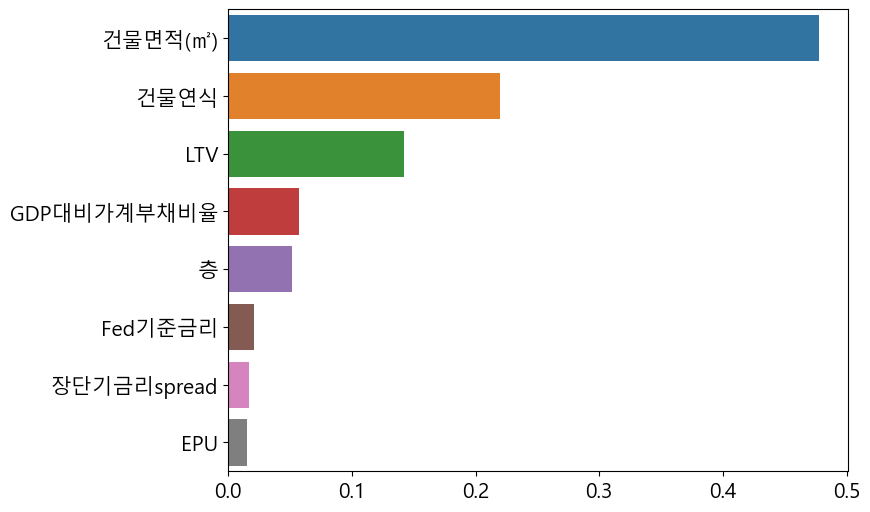

In [10]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# XGB

In [11]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [12]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,67600
1,관악구,2016-01-01,105.36,1,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,23,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,37300
2,동작구,2016-01-01,109.70,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,13,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,49000
3,은평구,2016-01-01,134.87,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,74000
4,서초구,2016-01-01,134.36,12,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,11,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,94000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100076,성동구,2022-12-30,148.23,12,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,36,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,180000
100077,용산구,2022-12-30,114.60,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,24,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,215000
100078,강남구,2022-12-30,144.20,8,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,44,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,430000
100079,송파구,2022-12-31,100.82,1,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,185000


In [13]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리','건물연식', 'GDP대비가계부채비율','EPU', '장단기금리spread','LTV', '물건금액(만원)']]

In [14]:
df

,자치구,계약일,건물면적(㎡),층,Fed기준금리,건물연식,GDP대비가계부채비율,EPU,장단기금리spread,LTV,물건금액(만원)
0,은평구,2016-01-01,101.97,9,0.34,6,83.3,177.148845,0.14,0.7,67600
1,관악구,2016-01-01,105.36,1,0.34,23,83.3,177.148845,0.14,0.7,37300
2,동작구,2016-01-01,109.70,9,0.34,13,83.3,177.148845,0.14,0.7,49000
3,은평구,2016-01-01,134.87,3,0.34,6,83.3,177.148845,0.14,0.7,74000
4,서초구,2016-01-01,134.36,12,0.34,11,83.3,177.148845,0.14,0.7,94000
...,...,...,...,...,...,...,...,...,...,...,...
100076,성동구,2022-12-30,148.23,12,4.10,36,105.0,169.662386,0.39,0.0,180000
100077,용산구,2022-12-30,114.60,15,4.10,24,105.0,169.662386,0.39,0.0,215000
100078,강남구,2022-12-30,144.20,8,4.10,44,105.0,169.662386,0.39,0.0,430000
100079,송파구,2022-12-31,100.82,1,4.10,34,105.0,169.662386,0.39,0.0,185000


In [15]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [16]:
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]

In [17]:
scaler = MinMaxScaler()
scaler
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

In [18]:
# 랜덤 포레스트 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.01743338016720414
Test set RMSE: 0.1320355261556682
Test set r2_score : 0.7199802968284769


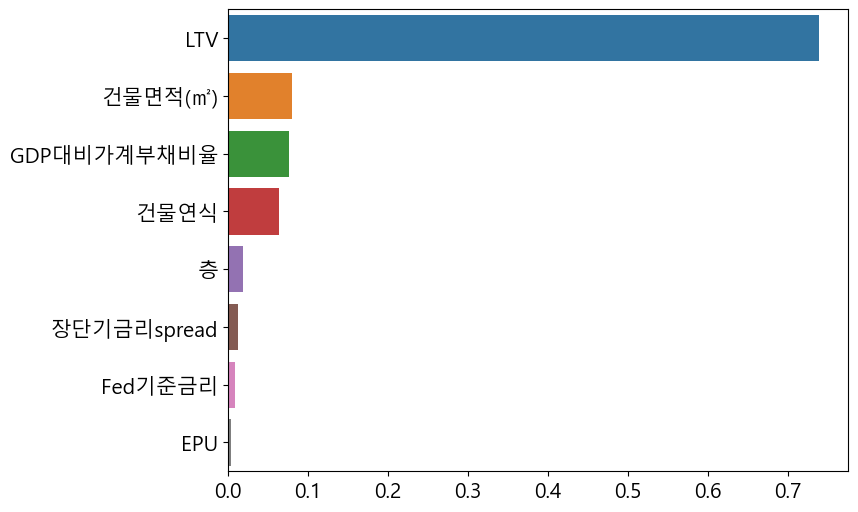

In [19]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# DT

In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [21]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,67600
1,관악구,2016-01-01,105.36,1,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,23,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,37300
2,동작구,2016-01-01,109.70,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,13,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,49000
3,은평구,2016-01-01,134.87,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,74000
4,서초구,2016-01-01,134.36,12,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,11,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,94000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100076,성동구,2022-12-30,148.23,12,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,36,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,180000
100077,용산구,2022-12-30,114.60,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,24,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,215000
100078,강남구,2022-12-30,144.20,8,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,44,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,430000
100079,송파구,2022-12-31,100.82,1,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,185000


In [22]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리','건물연식', 'GDP대비가계부채비율','EPU', '장단기금리spread','LTV', '물건금액(만원)']]

In [23]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [24]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [25]:
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]

In [26]:
scaler = MinMaxScaler()
scaler
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

In [27]:
# 랜덤 포레스트 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.026584004983472954
Test set RMSE: 0.1630460210599233
Test set r2_score : 0.5730004673111986


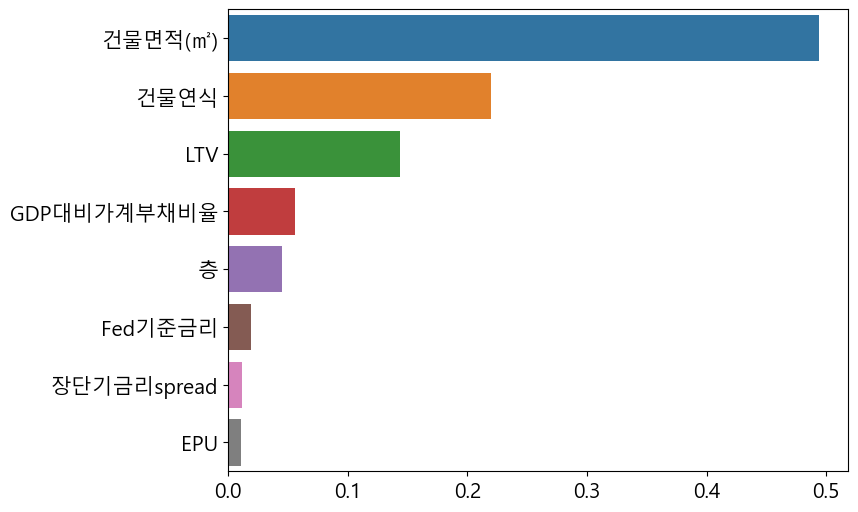

In [28]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()